# ML Classification`DT` Startup File

Version  | Date | Author | Notes |
:-------:|:----:|:-------|:-----:|
0.1 |20 July 2023| Ken Dizon | Initial version

**Objective**

Write a startup ML script for Classification using Decision Trees.

### Algorithms
Classification | 
:---------:|
DT, naive bayes, KNN, logistic, NN, SVM |
______________________
#### Content
1. **Load data**
    * 1.1 Data Exploration
2. **Data Preprocessing**
    * 2.1 Cleaning
    * 2.2 Missing Data
    * 2.3 Scaling
3. **Split - Test & Train**
4. **Model Selection**
5. **Model Training**
5. **Model Evaluation**

### Libraries

In [33]:
try:
    import numpy as np #math library 
    import scipy #computation
    import matplotlib.pyplot as plt #visualization
    %matplotlib inline
    import pandas as pd #dataframes
    import sklearn #algorithims
    from sklearn import preprocessing
    from sklearn.model_selection import train_test_split
    from sklearn import metrics 
    '''machine learning library'''
    from sklearn.tree import DecisionTreeClassifier #DT
    import sklearn.tree as tree
    
    print('https://scikit-learn.org/stable/')
    print("Libraries imported successfully!")
except ImportError:
    print("Libraries not installed. Please install it to use this library.")

https://scikit-learn.org/stable/
Libraries imported successfully!


_________
# [1] Load Data

In [2]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'

In [3]:
# Load
try:
    df = pd.read_csv(filepath)
    print("Data imported successfully!")
except ImportError:
    print("Data not installed. Please Load Data.")
# take a look at the dataset
df.head()

Data imported successfully!


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


## 1.1 Data Exploration

In [4]:
df.shape

(200, 6)

In [5]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Na_to_K'}>]], dtype=object)

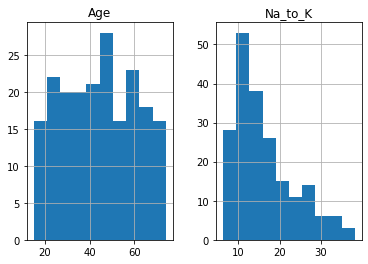

In [15]:
df.hist()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


**scikit-learn library, we have to convert the Pandas data frame to a Numpy array:**

_____
# [2] Data Preprocessing 
**NOTE:** As this is already a refined dataset we skip steps
- Cleaning
- Missing data
- Scaling

In [8]:
# Remove the column containing the target name since it doesn't contain numeric values.
# Set 'x' features
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

Features in this dataset are categorical, such as `Sex` or `BP`. 
- Sklearn Decision Trees does not handle categorical variables. We can still convert these features to numerical values using **pandas.get_dummies()** to convert the categorical variable into dummy/indicator variables.

In [10]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 

le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])

le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [11]:
# Target - y
y = df["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

# [3] Creating train and test dataset


In [16]:
from sklearn.model_selection import train_test_split

- `train_test_split` will return 4 different parameters named:
    - X_trainset, X_testset, y_trainset, y_testset
- train_test_split will need the parameters:
    - `X, y,` are the arrays required before the split
    - `test_size=0.3` represents the ratio of the testing dataset
    - `random_state=3` random_state ensures that we obtain the same splits

In [18]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y,
                                                                test_size=0.3,
                                                                random_state=3)

In [25]:
print('Shape of X training set {}'.format(X_trainset.shape),
      '\nSize of Y training set {}\n'.format(y_trainset.shape))
print('Shape of X test set {}'.format(X_testset.shape),
      '\nSize of Y test set {}'.format(y_testset.shape))

Shape of X training set (140, 5) 
Size of Y training set (140,)

Shape of X test set (60, 5) 
Size of Y test set (60,)


_______
# [4] Model Selection

### Decision Trees
A decision tree can be constructed by considering the attributes one by one. 
1. choose an attribute from our dataset
2. calculate the significance of the attribute to see if it's an effective attribute or not for splitting of the data.
    - more predictiveness
    - less impurity
    - lower entropy
3. split the data based on the value of the best attribute
4. go to each branch and repeat it for the rest of the attributes

In [27]:
#The entropy in a node is the amount of information disorder calculated in each node

# create an instance of the DecisionTreeClassifier called drugTree
drugTree = DecisionTreeClassifier(criterion="entropy", 
                                  max_depth = 4)
#specify criterion="entropy" so we can see the information gain of each node.
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

_______
# [5] Model Training

In [29]:
#fit the data with the training feature matrix X_trainset and training response vector y_trainset
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [30]:
# prediction
predTree = drugTree.predict(X_testset)

In [31]:
print (predTree [0:5])
print (y_testset [0:5])


['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


____
# [6] Model Evaluation

In [34]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9833333333333333


_____
# Visualize Decision Tree

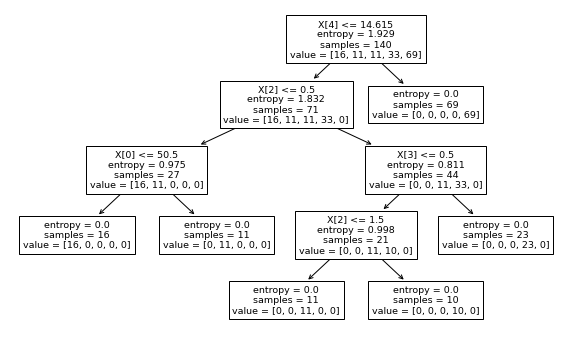

In [36]:
# Set the figure size
plt.figure(figsize=(10, 6)) 

tree.plot_tree(drugTree)
plt.show()